In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
#import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
#Classification Algorithms 
from sklearn import ensemble
from xgboost import XGBRegressor
from sklearn import metrics as m
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("pm2.5改.csv",header='infer')

In [3]:
print(data.isnull()) #資料全筆數

        year  month    day   hour  pm2.5   DEWP   TEMP   PRES   cbwd    Iws  \
0      False  False  False  False   True  False  False  False  False  False   
1      False  False  False  False   True  False  False  False  False  False   
2      False  False  False  False   True  False  False  False  False  False   
3      False  False  False  False   True  False  False  False  False  False   
4      False  False  False  False   True  False  False  False  False  False   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
43819  False  False  False  False  False  False  False  False  False  False   
43820  False  False  False  False  False  False  False  False  False  False   
43821  False  False  False  False  False  False  False  False  False  False   
43822  False  False  False  False  False  False  False  False  False  False   
43823  False  False  False  False  False  False  False  False  False  False   

          Is     Ir  
0      False  False  
1      

In [4]:
data.isnull().sum()#確認有無缺失值

year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [5]:
data=data.dropna() #刪去有NA的資料

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41757 entries, 24 to 43823
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    41757 non-null  int64  
 1   month   41757 non-null  int64  
 2   day     41757 non-null  int64  
 3   hour    41757 non-null  int64  
 4   pm2.5   41757 non-null  float64
 5   DEWP    41757 non-null  int64  
 6   TEMP    41757 non-null  float64
 7   PRES    41757 non-null  float64
 8   cbwd    41757 non-null  object 
 9   Iws     41757 non-null  float64
 10  Is      41757 non-null  int64  
 11  Ir      41757 non-null  int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 4.1+ MB


In [7]:
data.value_counts()#確認使用清洗後數據

year  month  day  hour  pm2.5  DEWP  TEMP   PRES    cbwd  Iws     Is  Ir
2010  1      2    0     129.0  -16   -4.0   1020.0  SE    1.79    0   0     1
2013  5      25   10    43.0    9     27.0  1012.0  cv    1.78    0   0     1
             24   16    146.0   15    23.0  1013.0  SE    7.15    0   0     1
                  17    76.0    16    22.0  1012.0  SE    8.94    0   0     1
                  18    56.0    15    23.0  1012.0  cv    0.89    0   0     1
                                                                           ..
2011  9      25   14    277.0   16    25.0  1016.0  SE    8.05    0   0     1
                  15    260.0   15    25.0  1015.0  SE    11.18   0   0     1
                  16    256.0   15    26.0  1015.0  SE    14.31   0   0     1
                  17    256.0   16    24.0  1015.0  SE    16.10   0   0     1
2014  12     31   23    12.0   -21   -3.0   1034.0  NW    249.85  0   0     1
Length: 41757, dtype: int64

In [8]:
# Convert the columns into categorical variables
data1 = data.copy()
data1['cbwd'] = data1['cbwd'].astype('category').cat.codes

In [9]:
data1.dtypes

year       int64
month      int64
day        int64
hour       int64
pm2.5    float64
DEWP       int64
TEMP     float64
PRES     float64
cbwd        int8
Iws      float64
Is         int64
Ir         int64
dtype: object

In [10]:
print(data1.shape)

(41757, 12)


In [11]:
y = data1['pm2.5']
x=data1.drop(['pm2.5'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [12]:
print('Train data shape {} {}'.format(x_train.shape, y_train.shape))
print('Test data shape {} {}'.format(x_test.shape, y_test.shape))

Train data shape (33405, 11) (33405,)
Test data shape (8352, 11) (8352,)


In [13]:
XGB = XGBRegressor(n_estimators=100,n_jobs=-1,learning_rate=0.3,random_state=42)
XGB_fit = XGB.fit(x_train, y_train)
test_y_predicted = XGB.predict(x_test)

In [14]:
print("Score: ",XGB.score(x_train, y_train))
print("Score: ",XGB.score(x_test, y_test))
print("MAE: ",mean_absolute_error(y_test,test_y_predicted))
print("RMSE: ",sqrt(mean_squared_error(y_test,test_y_predicted)))
print('MAPE',mean_absolute_percentage_error(y_test,test_y_predicted))

Score:  0.841723138123085
Score:  0.7548579783258387
MAE:  30.404061874024162
RMSE:  46.47658123911071
MAPE 0.596907077576596


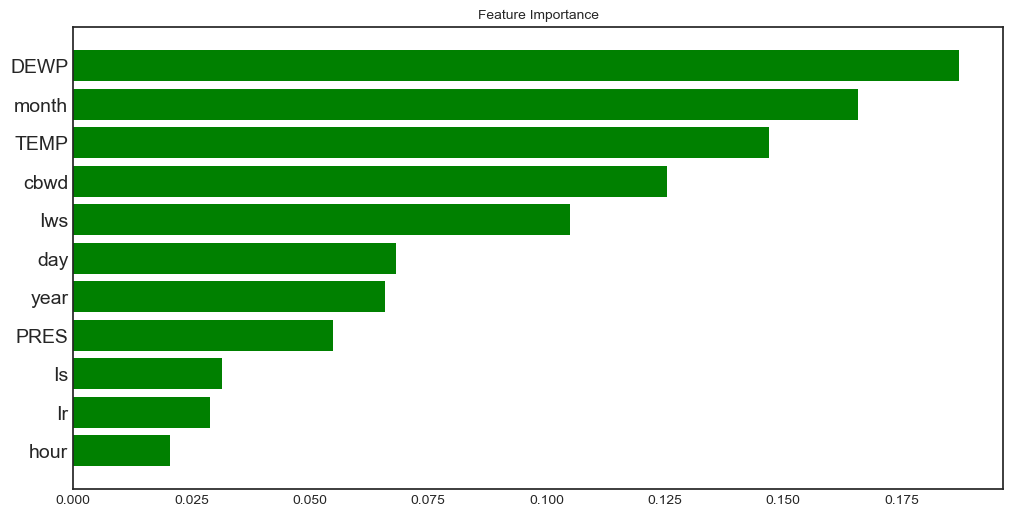

In [15]:
plt.style.use('seaborn-white')

XGBoost=XGBRegressor(n_estimators=100, learning_rate= 0.3,random_state=42)
XGBoost.fit(x_train, y_train)
importances = XGBoost.feature_importances_
feature_names = data.drop('pm2.5', axis=1).columns
indices = np.argsort(importances)

def feature_importance_graph(indices, importances, feature_names):
    plt.figure(figsize=(12,6))
    plt.title("Feature Importance", fontsize=10)
    plt.barh(range(len(indices)), importances[indices], color='g',  align="center")
    plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal',fontsize=14)
    plt.ylim([-1, len(indices)])
    
feature_importance_graph(indices, importances, feature_names)
plt.show()

In [16]:
data3=data.drop(columns=['hour',"Ir","Is",'PRES','year',"day"])#留下前五名

In [17]:
data3.value_counts()#確認資料

month  pm2.5  DEWP  TEMP   cbwd  Iws  
6      161.0   19    21.0  cv    0.89     3
8      35.0    19    30.0  SE    1.79     2
9      89.0    16    20.0  cv    0.89     2
3      21.0   -12    8.0   cv    0.89     2
5      108.0   17    23.0  cv    1.79     2
                                         ..
       12.0   -6     26.0  NW    68.39    1
              -4     18.0  NW    92.09    1
              -3     22.0  cv    4.91     1
                     26.0  cv    4.02     1
12     615.0  -7    -4.0   cv    5.34     1
Length: 41698, dtype: int64

In [18]:
# Convert the columns into categorical variables
data3 = data3.copy()
data3['cbwd'] = data3['cbwd'].astype('category').cat.codes

In [19]:
data3.dtypes

month      int64
pm2.5    float64
DEWP       int64
TEMP     float64
cbwd        int8
Iws      float64
dtype: object

In [20]:
print(data3.shape)

(41757, 6)


In [21]:
y2 = data3['pm2.5']
x2=data3.drop(['pm2.5'], axis=1)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2,test_size=0.20,random_state=42)

In [22]:
print('Train data shape {} {}'.format(x2_train.shape, y2_train.shape))
print('Test data shape {} {}'.format(x2_test.shape, y2_test.shape))

Train data shape (33405, 5) (33405,)
Test data shape (8352, 5) (8352,)


In [23]:
XGB2= XGBRegressor(n_estimators=100,n_jobs=-1,learning_rate=0.3,random_state=42)
XGB2_it = XGB2.fit(x2_train, y2_train)
y2_test_predicted = XGB2.predict(x2_test)

In [24]:
print("Score: ",XGB2.score(x2_train, y2_train))
print("Score: ",XGB2.score(x2_test, y2_test))
print("MAE: ",mean_absolute_error(y2_test,y2_test_predicted))
print("RMSE: ",sqrt(mean_squared_error(y2_test,y2_test_predicted)))
print('MAPE',mean_absolute_percentage_error(y2_test,y2_test_predicted))

Score:  0.6441555581751965
Score:  0.5249968428224465
MAE:  42.50241080107046
RMSE:  64.6954206222086
MAPE 0.7639915581809628
